In [1]:
import pandas as pd
import scipy.io 
from math import sqrt
from math import pi
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = scipy.io.loadmat('data.mat')
f1 = pd.DataFrame(data["F1"])
f2 = pd.DataFrame(data["F2"])
z1 = pd.DataFrame(data["F1"])

In [3]:
f2.head()

,0,1,2,3,4
0,1.155522,5.976320,1.166120,3.404068,1.213527
1,1.397389,6.126347,2.703015,3.193631,0.446557
2,1.644273,4.057585,1.851291,2.439176,0.517996
3,1.189022,6.477521,2.630235,1.910663,1.627726
4,0.933073,3.678706,1.248516,2.625154,1.860417


In [4]:
f1.rename(columns = {0:"c1",1:"c2",2:"c3",3:"c4",4:"c5"},inplace = True)
f2.rename(columns = {0:"c1",1:"c2",2:"c3",3:"c4",4:"c5"},inplace = True)
z1.rename(columns = {0:"c1",1:"c2",2:"c3",3:"c4",4:"c5"},inplace = True)

In [5]:
f1.index = range(1,1001)
f2.index = range(1,1001)
z1.index = range(1,1001)

In [6]:
f1

,c1,c2,c3,c4,c5
1,7.905430,9.035490,4.534891,14.166835,11.883470
2,6.603707,10.298966,1.998801,12.687553,10.392322
3,6.108960,7.101807,3.629037,12.606273,12.205932
4,5.295339,7.438817,0.769919,11.009843,9.003759
5,8.086083,7.633613,4.485315,14.777762,11.850740
...,...,...,...,...,...
996,8.618087,9.255606,3.555864,13.496576,11.134077
997,6.508958,6.037424,3.098812,11.758764,9.427472
998,5.519596,8.058121,3.208577,12.482024,11.016272
999,9.378744,10.004435,8.054605,14.751104,13.046086


In [7]:
f1_mean=[]
f2_mean =[]
z1_mean=[]
f1_sd=[]
f2_sd=[]
z1_sd=[]

In [8]:
for i in range(5):
        f1_mean.append(f1.iloc[:,i][0:100].mean())
        f2_mean.append(f2.iloc[:,i][0:100].mean())
        f1_sd.append(f1.iloc[:,i][0:100].std())
        f2_sd.append(f2.iloc[:,i][0:100].std())
        
        

In [9]:
f1_mean

[7.093276745822096,
 9.144547521590674,
 4.287691491993289,
 13.337490067473516,
 11.241858897026827]

In [10]:
f1_test =f1[100:1001]
f2_test =f2[100:1001]

In [11]:
def calculate_probability(x, mean, sd):
    expon = exp(-((x-mean)**2 / (2 * sd**2 )))
    return (1 / (sqrt(2 * pi) * sd)) * expon

In [12]:
def prob_array(x,mean,sd):
    prob = []
    for i in range(0,5):
        prob.append(calculate_probability(x,mean[i],sd[i]))
        
    return prob

In [13]:
def prob_array_zf(x,y):
    prob =[]
    for i in range(0,5):
        prob.append([calculate_probability(x,z1_mean[i],z1_sd[i])*calculate_probability(y,f2_mean[i],f2_sd[i])])
    return prob

In [14]:
#for the case X = F1
correct=0
for i in range(900):
    for j in range(0,5):
        x = f1_test.iloc[i,j]
        prob = prob_array(x,f1_mean,f1_sd)  
        if(prob.index(max(prob))==j):
            correct= correct+1

In [15]:
print(correct)
correct/4500

2385


0.53

In [16]:
for i in range(1000):
    l=[]
    for j in range(5):
        l.append(z1.iloc[i,j])
    mean = np.mean(l)
    sd = np.std(l)
    for j in range(5):
        y =z1.iloc[i,j]
        z1.iloc[i,j] = (y-mean)/sd

In [17]:
z1

,c1,c2,c3,c4,c5
1,-0.482923,-0.141797,-1.500374,1.407182,0.717912
2,-0.478534,0.507935,-1.707839,1.145581,0.532857
3,-0.631612,-0.349321,-1.336717,1.215738,1.101911
4,-0.401305,0.209539,-1.690952,1.227204,0.655514
5,-0.358164,-0.484711,-1.365227,1.513365,0.694736
...,...,...,...,...,...
996,-0.180072,0.013207,-1.714805,1.298958,0.582711
997,-0.288173,-0.446669,-1.434422,1.476439,0.692824
998,-0.743168,0.000352,-1.420052,1.296089,0.866779
999,-0.675000,-0.421835,-1.210766,1.498739,0.808862


In [18]:
z1_mean=[]
z1_sd=[]
for i in range(5):
        z1_mean.append(z1.iloc[:,i][0:100].mean())
        z1_sd.append(z1.iloc[:,i][0:100].std())   

In [19]:
z1_test =z1[100:1001]

In [20]:
#for the case X = Z1

correct=0
for i in range(900):
    for j in range(0,5):
        x = z1_test.iloc[i,j]
        prob = prob_array(x,z1_mean,z1_sd)
        if(prob.index(max(prob))==j):
            correct= correct+1
        
   

In [21]:
print(correct)
correct/4500

3974


0.8831111111111111

In [22]:
#for the case X = F2

correct=0
for i in range(900):
    for j in range(0,5):
        x = f2_test.iloc[i,j]
        prob = prob_array(x,f2_mean,f2_sd)
        if(prob.index(max(prob))==j):
            correct= correct+1
        


In [23]:
print(correct)
correct/4500

2479


0.5508888888888889

In [24]:

val_f1=f1.iloc[:,0]
val_f1 = val_f1.append(f1.iloc[:,1])
val_f1 = val_f1.append(f1.iloc[:,2])
val_f1 = val_f1.append(f1.iloc[:,3])
val_f1 = val_f1.append(f1.iloc[:,4])

val_f2=f2.iloc[:,0]
val_f2 = val_f2.append(f2.iloc[:,1])
val_f2 = val_f2.append(f2.iloc[:,2])
val_f2 = val_f2.append(f2.iloc[:,3])
val_f2 = val_f2.append(f2.iloc[:,4])

val_z1=z1.iloc[:,0]
val_z1 = val_z1.append(z1.iloc[:,1])
val_z1 = val_z1.append(z1.iloc[:,2])
val_z1 = val_z1.append(z1.iloc[:,3])
val_z1 = val_z1.append(z1.iloc[:,4])
class_val =[]
class_val = [1]*1000+[2]*1000+[3]*1000+[4]*1000+[5]*1000


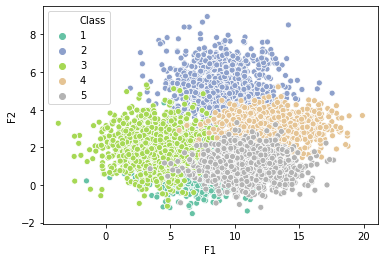

In [25]:
plot_data = pd.DataFrame(data={'F1': val_f1, 'F2': val_f2,'Class':class_val})

sns.scatterplot( x="F1", y="F2", data=plot_data, hue='Class', legend='full',palette='Set2')


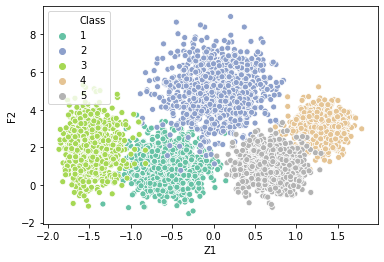

In [26]:
plot_data = pd.DataFrame(data={'Z1': val_z1, 'F2': val_f2,'Class':class_val})

sns.scatterplot( x="Z1", y="F2", data=plot_data, hue='Class', legend='full',palette='Set2')


In [27]:
#for the case X = [Z1 F2] 

correct=0
for i in range(900):
    for j in range(0,5):
        x = z1_test.iloc[i,j]
        y = f2_test.iloc[i,j]
        prob = prob_array_zf(x,y)
        if(prob.index(max(prob))==j):
            correct= correct+1

In [29]:
print(correct)
correct/4500

4409


0.9797777777777777

The Accuracy Rates of different Classifiers as follows:                                                      
    Case 1) X=F1 : Accuracy was ~53%                                      
    Case 2) X=Z1 : Accuracy was ~88.3%                                  
    Case 3) X=F2 : Accuracy was ~55%                           
    Case 4) X=[Z1 F2] : Accuracy was ~98%
    